<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando dados

In [0]:
import pandas as pd

Import csvs from git

In [0]:
df_m = pd.read_csv("https://media.githubusercontent.com/media/vitorsr/ccd/master/data/bdmep_meta.csv?token=AFPQLZC3565PRPVW4B6VHPK5WIBZQ")

In [0]:
df = pd.read_csv("https://media.githubusercontent.com/media/vitorsr/ccd/master/data/inmetr.csv?token=AFPQLZE3FSY4QGCXIW4JTAC5WICC4")

In [39]:
df.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
0,1970-05-04 00:00:00,83010,NaN,NaN,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.75,NaN
1,1970-05-04 12:00:00,83010,NaN,25.3,24.0,NaN,23.7,90.0,1005.9,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
2,1970-05-04 18:00:00,83010,NaN,29.2,27.1,NaN,NaN,85.0,1004.2,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,1970-05-05 00:00:00,83010,NaN,25.0,27.0,32.6,NaN,92.0,1007.5,NaN,NaN,NaN,NaN,8.0,2.4,88.25,NaN
4,1970-05-05 12:00:00,83010,0.0,25.9,24.8,NaN,23.0,91.0,1006.4,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [40]:
df_m.head()

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
1,82704,-72.666667,-7.633333,170.00,Cruzeiro do Sul,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
3,82807,-70.766667,-8.166667,190.00,Tarauacá,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
4,83098,-36.166667,-10.150000,56.13,Coruripe,Alagoas,AL,America/Maceio,-3,America/Maceio,-3


### Dicionário de dados:

<br><b>variável | descrição | unidade </b></br>
<br>date | data e hora da coleta             -
<br> id | ID da estação de coleta             -
<br>prec | precipitação |       mm
<br>tair | temperatura do ar  | graus Celsius
<br>tw | temperatura de bulbo úmido |  graus Celsius
<br>tmax | temperatura máxima do ar  | graus Celsius
<br>tmin | temperatura mínima do ar  | graus Celsius
<br>urmax | umidade relativa máxima  |             %
<br>patm | pressão atmosférica         |    hPa
<br>pnmm | pressão atmosférica média ao nível do mar  |           hPa
<br>wd | direção do vento        |   graus
<br>wsmax  |  rajadas de vento    |         m/s
<br>n |  horas de sol          |     h
<br>cc |   cobertura de nuvens    |           -
<br>evap  |   evaporação        |      mm
<br>ur  |   umidade relativa          |     %
<br>ws   |   velocidade do vento       |      m/s



## Explorando

> **Hipótese**: as queimadas que ocorreram na amazônia, entre 8 e 22 de Agosto de 2019 influenciaram as temperaturas na região e/ou no restante do país?

# Prophet
## Quick Start

Source: https://facebook.github.io/prophet/docs/quick_start.html

In [0]:
import pandas as pd
from fbprophet import Prophet

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [0]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.199274,7.424390,8.918249
3266,2017-01-16,8.524244,7.824686,9.242213
3267,2017-01-17,8.311615,7.601617,9.069066
3268,2017-01-18,8.144232,7.457654,8.921919
3269,2017-01-19,8.156091,7.488055,8.925667


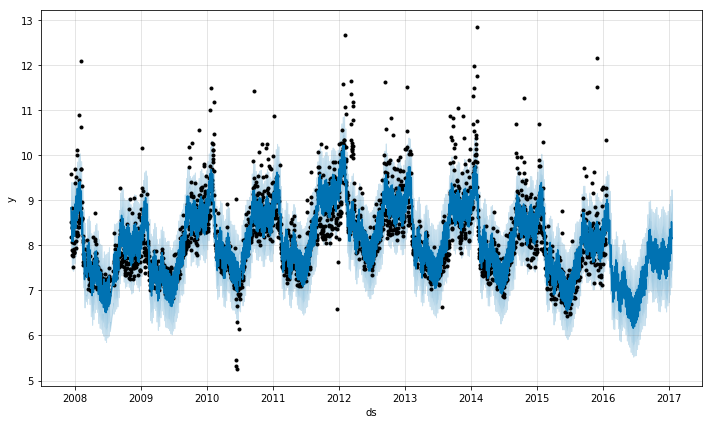

In [0]:
fig1 = m.plot(forecast)

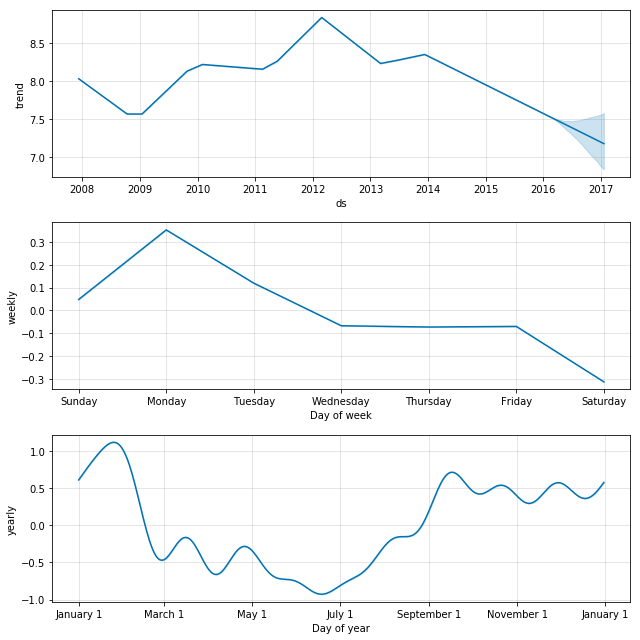

In [0]:
fig2 = m.plot_components(forecast)